<a href="https://colab.research.google.com/github/ZainabSMU/GenAI/blob/main/GenAI_Final_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PART 1

In [ ]:
# This block is just setting up and installing libraries

import torch

!pip install -U transformers datasets nltk beautifulsoup4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 17.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0
  Attempting uninstall: nltk
    Found existing installation: nltk 3.9.1
    Uninstalling nltk-3.9.1:
      Successfully uninstalled nltk-3.9.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.13.5
    Uninstalling beautifulsoup4-4.13.5:
      Successfully uninstalled beautifulsoup4-4.13.5
  Attempting uninstall: transforme

In [ ]:
# These are the imports for all the data that will be built
import os, random, requests
from datasets import load_dataset
from bs4 import BeautifulSoup

import nltk
from nltk.tokenize import sent_tokenize

# NLTK models for sentence splitting
nltk.download("punkt")
nltk.download("punkt_tab")

os.makedirs("data", exist_ok=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Building the general corpus from BookCorpus
max_general_sentences = 200_000  # lower to 100_000 if training is slow ########################

print("Loading BookCorpus from the community dataset rojagtap/bookcorpus...")
book = load_dataset("rojagtap/bookcorpus", split="train")

general_sentences = []
print("Processing BookCorpus...")

for i, row in enumerate(book):
    text = row.get("text", "")
    if not text or not text.strip():
        continue

    for s in sent_tokenize(text):
        s = s.strip()
        if len(s.split()) > 5:  # this filters out the very short/noisy sentences
            general_sentences.append(s)

    if len(general_sentences) >= max_general_sentences:
        break

    if i % 5000 == 0:
        print(f"Processed {i} rows, {len(general_sentences)} sentences collected...")

print(f"Final general sentences: {len(general_sentences)}")

random.shuffle(general_sentences)

gen_path = "data/general_corpus.txt"
with open(gen_path, "w", encoding="utf-8") as f:
    for s in general_sentences:
        f.write(s + "\n")

print("Saved general corpus to:", gen_path)

Loading BookCorpus from the community dataset rojagtap/bookcorpus...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

books_large_p1.txt:   0%|          | 0.00/2.52G [00:00<?, ?B/s]

books_large_p2.txt:   0%|          | 0.00/2.10G [00:00<?, ?B/s]

Generating train split:   0%|          | 0/74004228 [00:00<?, ? examples/s]

Processing BookCorpus...
Processed 0 rows, 1 sentences collected...
Processed 5000 rows, 4166 sentences collected...
Processed 10000 rows, 8631 sentences collected...
Processed 15000 rows, 12993 sentences collected...
Processed 20000 rows, 17186 sentences collected...
Processed 25000 rows, 21702 sentences collected...
Processed 30000 rows, 26249 sentences collected...
Processed 35000 rows, 30113 sentences collected...
Processed 40000 rows, 34444 sentences collected...
Processed 45000 rows, 38927 sentences collected...
Processed 50000 rows, 43216 sentences collected...
Processed 55000 rows, 47673 sentences collected...
Processed 60000 rows, 51450 sentences collected...
Processed 65000 rows, 56106 sentences collected...
Processed 70000 rows, 61030 sentences collected...
Processed 75000 rows, 65815 sentences collected...
Processed 80000 rows, 70464 sentences collected...
Processed 85000 rows, 74893 sentences collected...
Processed 90000 rows, 79180 sentences collected...
Processed 95000 r

In [ ]:
# Building the Paul Graham (PG) corpus from the website: paulgraham.com
BASE = "http://www.paulgraham.com/"
index_url = BASE + "articles.html"

print("Fetching essay index:", index_url)
index_html = requests.get(index_url).text
index_soup = BeautifulSoup(index_html, "html.parser")

links = []
for a in index_soup.find_all("a", href=True):
    href = a["href"]
    if href.endswith(".html") and not href.startswith("http"):
        links.append(href)

links = list(dict.fromkeys(links))
print(f"Found {len(links)} essay links.")

pg_sentences = []

for href in links:
    url = BASE + href
    print("Scraping:", url)
    html = requests.get(url).text
    soup = BeautifulSoup(html, "html.parser")

    for p in soup.find_all("p"):
        text = p.get_text(" ", strip=True)
        if not text:
            continue
        for s in sent_tokenize(text):
            s = s.strip()
            if len(s.split()) > 4:
                pg_sentences.append(s)

print(f"Total PG sentences collected: {len(pg_sentences)}")

pg_path = "data/pg_corpus.txt"
with open(pg_path, "w", encoding="utf-8") as f:
    for s in pg_sentences:
        f.write(s + "\n")

print("Saved PG corpus to:", pg_path)

Fetching essay index: http://www.paulgraham.com/articles.html
Found 230 essay links.
Scraping: http://www.paulgraham.com/index.html
Scraping: http://www.paulgraham.com/greatwork.html
Scraping: http://www.paulgraham.com/kids.html
Scraping: http://www.paulgraham.com/selfindulgence.html
Scraping: http://www.paulgraham.com/field.html
Scraping: http://www.paulgraham.com/goodwriting.html
Scraping: http://www.paulgraham.com/do.html
Scraping: http://www.paulgraham.com/woke.html
Scraping: http://www.paulgraham.com/writes.html
Scraping: http://www.paulgraham.com/when.html
Scraping: http://www.paulgraham.com/foundermode.html
Scraping: http://www.paulgraham.com/persistence.html
Scraping: http://www.paulgraham.com/reddits.html
Scraping: http://www.paulgraham.com/google.html
Scraping: http://www.paulgraham.com/best.html
Scraping: http://www.paulgraham.com/superlinear.html
Scraping: http://www.paulgraham.com/getideas.html
Scraping: http://www.paulgraham.com/read.html
Scraping: http://www.paulgraham.c

In [ ]:
# Just doing a sanity check here to make sure the corpus got built properly
print("General corpus sample:")
!head -n 5 data/general_corpus.txt

print("\nPG corpus sample:")
!head -n 5 data/pg_corpus.txt

General corpus sample:
the occasional comments about this story i came across in books about lovecraft were disparaging , but that only increased my curiosity about it .
the bird lady went first and the fat lady behind with prissi sandwiched between the uneven slices .
sharianna smiled sweetly and waved goodbye .
shes mr. bowens replacement as rare books librarian , isnt she ?
it was the extra dna , formally named supernumerary accentric fragments , which were triggering the rejections .

PG corpus sample:
A wealth tax will usually have a threshold at which it starts.
How much difference would a high threshold make?
To model that,
we need to make some assumptions about the initial value of
your stock and the growth rate.


In [ ]:
# This block defines the SimCSEModel, dataset, and the training loop/function

import os, json
from dataclasses import dataclass
from typing import List

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW

from transformers import (
    BertTokenizerFast,
    BertModel,
    get_cosine_schedule_with_warmup,
)

### Training Config ###

@dataclass
class TrainingConfig:
    model_name: str
    train_file: str
    output_dir: str
    max_length: int = 128
    batch_size: int = 128
    lr: float = 2e-5
    weight_decay: float = 0.01
    num_epochs: int = 1
    warmup_ratio: float = 0.1
    temperature: float = 0.05
    device: str = "cuda" if torch.cuda.is_available() else "cpu" # Controls whether the training runs on GPU or CPU (I used the A100 GPU)


### Dataset ###

# This just loads the corpus text files created above for training in the coming steps. Hence, why the .txt file was created with one sentence per line.
class TextLineDataset(Dataset):
    """Plain text file with ONE sentence per line."""
    def __init__(self, path: str):
        if not os.path.exists(path):
            raise FileNotFoundError(f"Train file not found: {path}")
        with open(path, "r", encoding="utf-8") as f:
            self.lines = [line.strip() for line in f if line.strip()]

    def __len__(self):
        return len(self.lines)

    def __getitem__(self, idx):
        return self.lines[idx]


def collate_fn(batch: List[str], tokenizer: BertTokenizerFast, max_length: int):
    enc = tokenizer(
        batch,
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors="pt",
    )
    return enc


### SimCSE Model (the embedding architecture; FIRST APPROACH) ###

class SimCSEModel(nn.Module):
    """
    This section has the BERT encoder, CLS pooling, projection, contrastive loss.
    """
    def __init__(self, model_name: str, temperature: float = 0.05):
        super().__init__()
        self.encoder = BertModel.from_pretrained(model_name)
        hidden_size = self.encoder.config.hidden_size
        self.projection = nn.Sequential(
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
        )
        self.temperature = temperature

    def encode(self, batch):
        outputs = self.encoder(
            input_ids=batch["input_ids"],
            attention_mask=batch["attention_mask"],
        )
        cls = outputs.last_hidden_state[:, 0]
        proj = self.projection(cls)
        emb = nn.functional.normalize(proj, p=2, dim=-1)
        return emb

    def forward(self, batch):
        # two views via dropout
        z1 = self.encode(batch)
        z2 = self.encode(batch)

        batch_size = z1.size(0)
        sim = torch.matmul(z1, z2.t()) / self.temperature
        labels = torch.arange(batch_size, device=z1.device)
        loss = nn.CrossEntropyLoss()(sim, labels)
        return loss


### Training loop ###

def train_simcse(config: TrainingConfig):
    os.makedirs(config.output_dir, exist_ok=True)

    print("Loading tokenizer and dataset...")
    tokenizer = BertTokenizerFast.from_pretrained(config.model_name)
    train_dataset = TextLineDataset(config.train_file)
    train_loader = DataLoader(
        train_dataset,
        batch_size=config.batch_size,
        shuffle=True,
        drop_last=True,
        collate_fn=lambda b: collate_fn(b, tokenizer, config.max_length),
    )

    print(f"Dataset size: {len(train_dataset)} lines")
    print("Building model...")
    model = SimCSEModel(config.model_name, temperature=config.temperature)
    model.to(config.device)

    optimizer = AdamW(model.parameters(), lr=config.lr, weight_decay=config.weight_decay)

    total_steps = len(train_loader) * config.num_epochs
    warmup_steps = int(total_steps * config.warmup_ratio)
    scheduler = get_cosine_schedule_with_warmup(
        optimizer,
        num_warmup_steps=warmup_steps,
        num_training_steps=total_steps,
    )

    global_step = 0
    loss_log = []

    print("Starting training...")
    model.train()
    for epoch in range(config.num_epochs):
        for batch in train_loader:
            batch = {k: v.to(config.device) for k, v in batch.items()}
            loss = model(batch)
            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            scheduler.step()
            optimizer.zero_grad()

            global_step += 1
            loss_val = float(loss.item())
            loss_log.append(loss_val)

            if global_step % 100 == 0:
                print(f"Epoch {epoch+1} | Step {global_step} | Loss {loss_val:.4f}")

    final_model_path = os.path.join(config.output_dir, "final_model.pt")
    torch.save(model.state_dict(), final_model_path)

    loss_log_path = os.path.join(config.output_dir, "loss_log.json")
    with open(loss_log_path, "w", encoding="utf-8") as f:
        json.dump(loss_log, f)

    print(f"Training complete. Model saved to: {final_model_path}")
    print(f"Loss log saved to: {loss_log_path}")

In [ ]:
# This block trains both the general purpose model and the PG model

os.makedirs("checkpoints/general_simcse", exist_ok=True)
os.makedirs("checkpoints/pg_simcse", exist_ok=True)

### General Purpose embedding model ###
general_cfg = TrainingConfig(
    model_name="bert-base-uncased",
    train_file="data/general_corpus.txt",
    output_dir="checkpoints/general_simcse",
    max_length=128,
    batch_size=128,   # lower to 64 or 32 if you get CUDA OOM
    num_epochs=1,
    lr=2e-5,
)

train_simcse(general_cfg)

### Paul Graham–specific embedding model ###
pg_cfg = TrainingConfig(
    model_name="bert-base-uncased",
    train_file="data/pg_corpus.txt",
    output_dir="checkpoints/pg_simcse",
    max_length=256,
    batch_size=64,    # lower if needed
    num_epochs=3,
    lr=2e-5,
)

train_simcse(pg_cfg)

Loading tokenizer and dataset...


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Dataset size: 200000 lines
Building model...


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Starting training...
Epoch 1 | Step 100 | Loss 0.0016
Epoch 1 | Step 200 | Loss 0.0005
Epoch 1 | Step 300 | Loss 0.0003
Epoch 1 | Step 400 | Loss 0.0003
Epoch 1 | Step 500 | Loss 0.0002
Epoch 1 | Step 600 | Loss 0.0002
Epoch 1 | Step 700 | Loss 0.0002
Epoch 1 | Step 800 | Loss 0.0002
Epoch 1 | Step 900 | Loss 0.0002
Epoch 1 | Step 1000 | Loss 0.0001
Epoch 1 | Step 1100 | Loss 0.0001
Epoch 1 | Step 1200 | Loss 0.0001
Epoch 1 | Step 1300 | Loss 0.0001
Epoch 1 | Step 1400 | Loss 0.0001
Epoch 1 | Step 1500 | Loss 0.0001
Training complete. Model saved to: checkpoints/general_simcse/final_model.pt
Loss log saved to: checkpoints/general_simcse/loss_log.json
Loading tokenizer and dataset...
Dataset size: 28570 lines
Building model...
Starting training...
Epoch 1 | Step 100 | Loss 0.0150
Epoch 1 | Step 200 | Loss 0.0008
Epoch 1 | Step 300 | Loss 0.0004
Epoch 1 | Step 400 | Loss 0.0007
Epoch 2 | Step 500 | Loss 0.0004
Epoch 2 | Step 600 | Loss 0.0003
Epoch 2 | Step 700 | Loss 0.0002
Epoch 2 | St

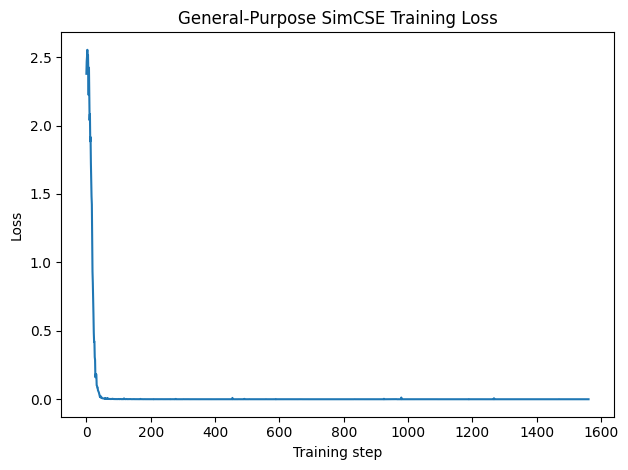

Saved plot to: plots/general_loss.png


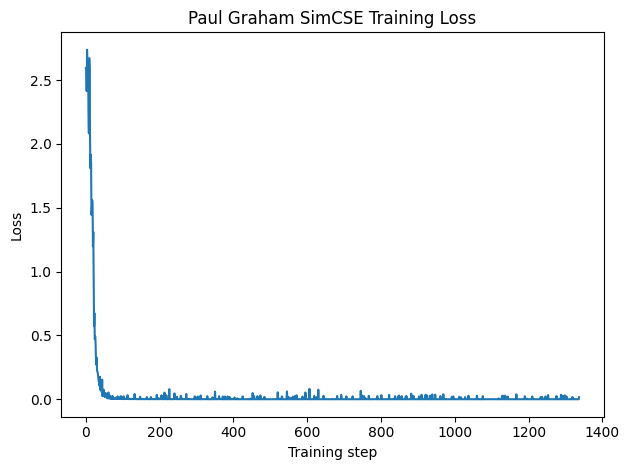

Saved plot to: plots/pg_loss.png


In [ ]:
# This section plots the training loss; it turns the JSON loss logs into PNGs
import json
import matplotlib.pyplot as plt
import os

os.makedirs("plots", exist_ok=True)

def plot_loss(path, title, out_path):
    with open(path, "r", encoding="utf-8") as f:
        loss = json.load(f)
    plt.figure()
    plt.plot(loss)
    plt.title(title)
    plt.xlabel("Training step")
    plt.ylabel("Loss")
    plt.tight_layout()
    plt.savefig(out_path, dpi=300)
    plt.show()
    print("Saved plot to:", out_path)

plot_loss(
    "checkpoints/general_simcse/loss_log.json",
    "General-Purpose SimCSE Training Loss",
    "plots/general_loss.png",
)

plot_loss(
    "checkpoints/pg_simcse/loss_log.json",
    "Paul Graham SimCSE Training Loss",
    "plots/pg_loss.png",
)


In [ ]:
# BERT-CLS Baseline Architecture (SECOND APPROACH); This section does not have training,
# it is just using the off-the-shelf bert-base-uncased CLS vectors

from transformers import BertModel, BertTokenizerFast

class BertCLSBaseline:
    def __init__(self, model_name="bert-base-uncased"):
        self.tokenizer = BertTokenizerFast.from_pretrained(model_name)
        self.encoder = BertModel.from_pretrained(model_name)
        self.encoder.to("cuda" if torch.cuda.is_available() else "cpu")
        self.device = "cuda" if torch.cuda.is_available() else "cpu"

    def encode(self, texts, max_length=256, batch_size=64):
        all_embs = []
        self.encoder.eval()
        with torch.no_grad():
            for i in range(0, len(texts), batch_size):
                batch = texts[i:i+batch_size]
                enc = self.tokenizer(
                    batch,
                    padding=True,
                    truncation=True,
                    max_length=max_length,
                    return_tensors="pt",
                )
                enc = {k: v.to(self.device) for k, v in enc.items()}
                outputs = self.encoder(**enc)
                cls = outputs.last_hidden_state[:, 0]
                emb = nn.functional.normalize(cls, p=2, dim=-1)
                all_embs.append(emb.cpu())
        return torch.cat(all_embs, dim=0).numpy()

In [ ]:
# Here we are creating a small retrieval validation set from the PG corpus .txt file we created above
import os

pg_path = "data/pg_corpus.txt"
assert os.path.exists(pg_path), "data/pg_corpus.txt not found – did you build the PG corpus?"

# How many sentences to use in the validation set
max_val_sentences = 500        # validation set takes first 500 sentences from the pg corpus; lower to 300 if needed
group_size = 10                # sentences per pseudo-document; basically groups artifically into documents of size 10

val_sentences = [] # list of sentences
val_essay_ids = [] # which essay each sentence came from

with open(pg_path, "r", encoding="utf-8") as f:
    lines = [line.strip() for line in f if line.strip()]

# Limit to max_val_sentences for speed
lines = lines[:max_val_sentences]

for i, s in enumerate(lines):
    val_sentences.append(s)
    # Assign a pseudo "essay id" based on groups of sentences
    doc_id = f"doc_{i // group_size}"
    val_essay_ids.append(doc_id)

print(f"Total validation sentences: {len(val_sentences)}")
print("First 3 examples:")
for i in range(min(3, len(val_sentences))):
    print(f"- [{val_essay_ids[i]}] {val_sentences[i]}")


Total validation sentences: 500
First 3 examples:
- [doc_0] A wealth tax will usually have a threshold at which it starts.
- [doc_0] How much difference would a high threshold make?
- [doc_0] To model that,


In [ ]:
# This part helps to encode texts with the SimCSE models
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

def encode_with_simcse(model_ckpt, texts, max_length=256, batch_size=64):
    model = SimCSEModel("bert-base-uncased", temperature=0.05)
    model.load_state_dict(torch.load(model_ckpt, map_location=device))
    model.to(device)
    model.eval()

    all_embs = []
    with torch.no_grad():
        for i in range(0, len(texts), batch_size):
            batch = texts[i:i+batch_size]
            enc = tokenizer(
                batch,
                padding=True,
                truncation=True,
                max_length=max_length,
                return_tensors="pt",
            )
            enc = {k: v.to(device) for k, v in enc.items()}
            embs = model.encode(enc)
            all_embs.append(embs.cpu())
    return torch.cat(all_embs, dim=0).numpy()

NameError: name 'torch' is not defined

In [ ]:
# Finally getting the embeddings
print("Encoding with SimCSE GENERAL model...")
val_embs_general = encode_with_simcse(
    "checkpoints/general_simcse/final_model.pt",
    val_sentences,
    max_length=128,
)

print("Encoding with SimCSE PG-SPECIFIC model...")
val_embs_pg = encode_with_simcse(
    "checkpoints/pg_simcse/final_model.pt",
    val_sentences,
    max_length=256,
)

print("Encoding with BERT-CLS baseline...")
bert_baseline = BertCLSBaseline("bert-base-uncased")
val_embs_bert = bert_baseline.encode(val_sentences, max_length=256, batch_size=64)

val_embs_general.shape, val_embs_pg.shape, val_embs_bert.shape

In [ ]:
# BUILDING RELEVANCE LISTS?? Here are the metrics
import numpy as np
from tqdm.auto import tqdm

# Build map essay_id -> sentence indices
essay_to_indices = {}
for idx, eid in enumerate(val_essay_ids):
    essay_to_indices.setdefault(eid, []).append(idx)

relevant_ids = []
query_indices = []

for idx, eid in enumerate(val_essay_ids):
    rel = [j for j in essay_to_indices[eid] if j != idx]
    if len(rel) == 0:
        continue
    query_indices.append(idx)
    relevant_ids.append(rel)

print(f"Usable queries: {len(query_indices)} / {len(val_sentences)}")

# Optional: subsample for speed
max_queries = 100
if len(query_indices) > max_queries:
    query_indices = query_indices[:max_queries]
    relevant_ids = relevant_ids[:max_queries]
    print(f"Subsampled to {max_queries} queries.")

In [ ]:
# METRIC??
def compute_rank_lists(embs, query_indices):
    embs = np.array(embs)
    rank_lists = []
    for qi in tqdm(query_indices):
        q_vec = embs[qi]
        sims = embs @ q_vec  # cosine since embs are normalized
        ranked = np.argsort(-sims)  # descending
        rank_lists.append(list(ranked))
    return rank_lists

def mrr_at_k(rank_lists, ground_truth, k=10):
    mrr = 0.0
    for ranked, gt in zip(rank_lists, ground_truth):
        rank = None
        for i, doc_id in enumerate(ranked[:k]):
            if doc_id in gt:
                rank = i + 1
                break
        if rank is not None:
            mrr += 1.0 / rank
    return mrr / len(rank_lists) if rank_lists else 0.0

def ndcg_at_k(rank_lists, ground_truth, k=10):
    def dcg(ranked_ids, gt_ids, k):
        score = 0.0
        for i, doc_id in enumerate(ranked_ids[:k]):
            if doc_id in gt_ids:
                score += 1.0 / np.log2(i + 2)
        return score

    ndcgs = []
    for ranked, gt in zip(rank_lists, ground_truth):
        if not gt:
            ndcgs.append(0.0)
            continue
        ideal = dcg(gt, gt, min(k, len(gt)))
        actual = dcg(ranked, gt, k)
        ndcgs.append(0.0 if ideal == 0.0 else actual / ideal)
    return float(np.mean(ndcgs)) if ndcgs else 0.0


In [ ]:
# compute metrics for all 3 models
print("Computing rankings for SimCSE GENERAL...")
rank_lists_general = compute_rank_lists(val_embs_general, query_indices)

print("Computing rankings for SimCSE PG...")
rank_lists_pg = compute_rank_lists(val_embs_pg, query_indices)

print("Computing rankings for BERT-CLS baseline...")
rank_lists_bert = compute_rank_lists(val_embs_bert, query_indices)

mrr_gen = mrr_at_k(rank_lists_general, relevant_ids, k=10)
ndcg_gen = ndcg_at_k(rank_lists_general, relevant_ids, k=10)

mrr_pg = mrr_at_k(rank_lists_pg, relevant_ids, k=10)
ndcg_pg = ndcg_at_k(rank_lists_pg, relevant_ids, k=10)

mrr_bert = mrr_at_k(rank_lists_bert, relevant_ids, k=10)
ndcg_bert = ndcg_at_k(rank_lists_bert, relevant_ids, k=10)

print("\n=== Retrieval Metrics on PG Validation Set (Part 1) ===")
print(f"SimCSE GENERAL:    MRR@10 = {mrr_gen:.4f}, nDCG@10 = {ndcg_gen:.4f}")
print(f"SimCSE PG-SPECIFIC: MRR@10 = {mrr_pg:.4f}, nDCG@10 = {ndcg_pg:.4f}")
print(f"BERT-CLS BASELINE: MRR@10 = {mrr_bert:.4f}, nDCG@10 = {ndcg_bert:.4f}")


PART 2